In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

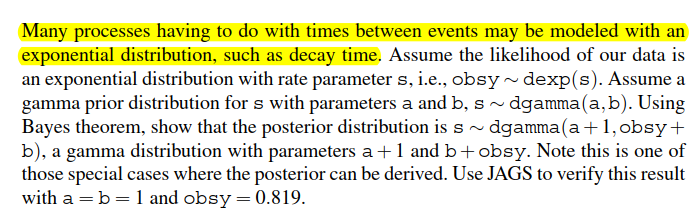

Sequential sampling (2 chains in 1 job)
Metropolis: [s]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 5 seconds.
The number of effective samples is smaller than 25% for some parameters.


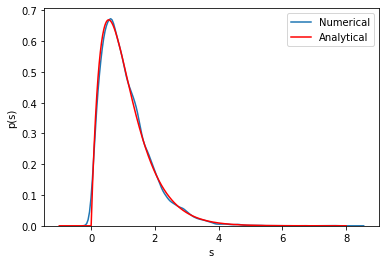

In [15]:
ss = np.linspace(-1,8,1000)
with pm.Model():
    s = pm.Gamma('s',alpha=1,beta=1) # s = prior
    obs = pm.Exponential('obs',lam = s,observed = 0.819) # observed = x
    step = pm.Metropolis()
    trace = pm.sample(20000,step)
sns.kdeplot(trace['s'])
analytical = stats.gamma.pdf(ss,a = 2, scale = 1/1.819)
sns.lineplot(ss,analytical , color = 'r')
plt.xlabel('s')
plt.ylabel('p(s)')
plt.legend(['Numerical','Analytical'])
plt.show()

As you can see, both analytical and numerical approach have the same result.

You can find the analytical proof in 'mathematical proof' folder